In [13]:
from CSR import *
import matplotlib.pyplot as plt
import matplotlib.colors as colors

In [14]:
def plot_2D_contour(x, y, z, title = None):
    
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    norm = colors.TwoSlopeNorm( vcenter=0)
    surf = ax.imshow(z, extent=(min(x), max(x), min(y), max(y)), origin='lower',  cmap='seismic',aspect='auto', norm = norm)
    
    fig.colorbar(surf, shrink=0.5, aspect=5)
    

    #fig.colorbar(surf, shrink=0.5, aspect=5)
    plt.xlabel('x ($ \mu m$)')
    plt.ylabel('z ($ m$)')

    if title:
        plt.title(title)

    plt.show()
    plt.close()
    return ax

In [15]:
DtestCSR = CSR2D(input_file= 'input/chicane_config.yaml')
DtestCSR.CSR_params.compute_CSR = 0
DtestCSR.run(stop_time  =0.5)

Finish step 2 in 0.6525468826293945 seconds
Finish step 3 in 0.5906722545623779 seconds
Finish step 4 in 0.5976531505584717 seconds
Finish step 5 in 0.5578694343566895 seconds
Finish step 6 in 0.5623137950897217 seconds
Finish step 7 in 0.5737907886505127 seconds
Finish step 8 in 0.5962493419647217 seconds
Finish step 9 in 0.6765897274017334 seconds
Finish step 10 in 0.6761956214904785 seconds
Finish step 11 in 0.6655967235565186 seconds
Finish step 12 in 0.5858733654022217 seconds


In [17]:
DtestCSR.formation_length*1.5

2.0605569490120255

In [4]:
tan_theta = DtestCSR.beam._slope[0]
tan_theta

-0.5122648221745171

In [5]:
DtestCSR.beam.sigma_x

5.973547736139567e-05

12.79999999999997


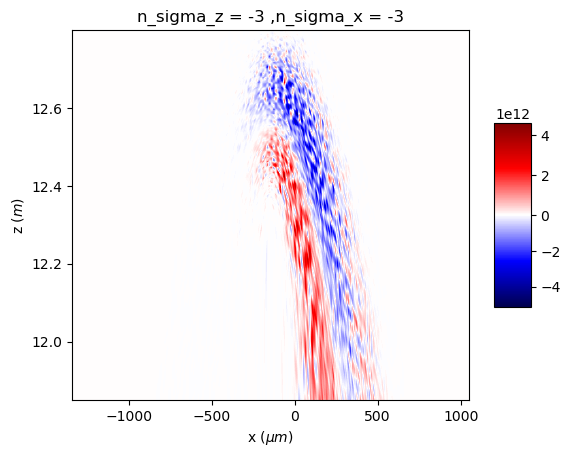

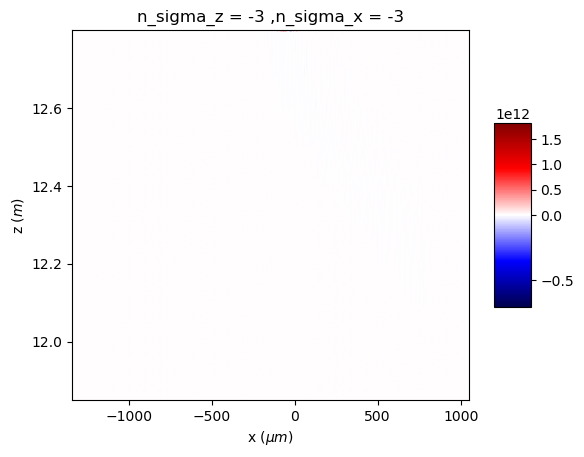

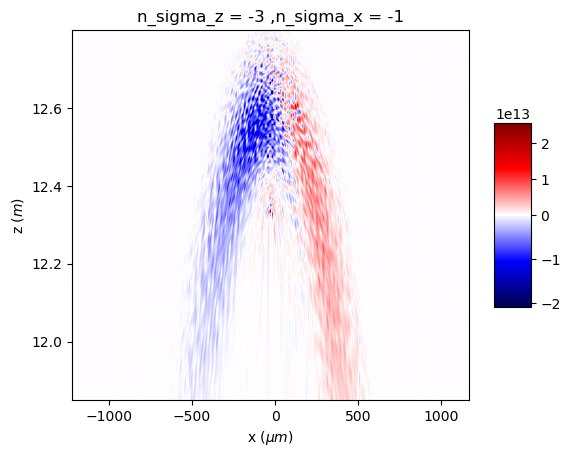

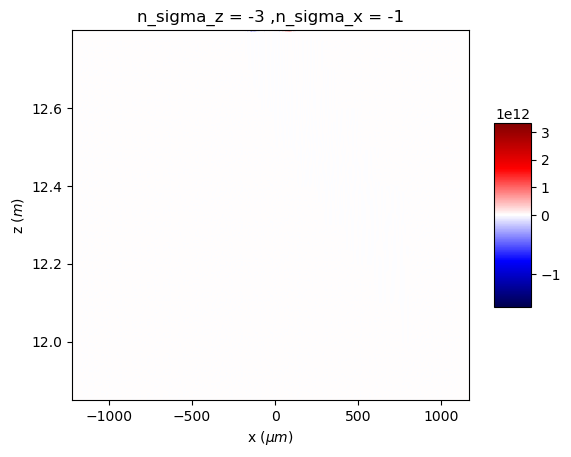

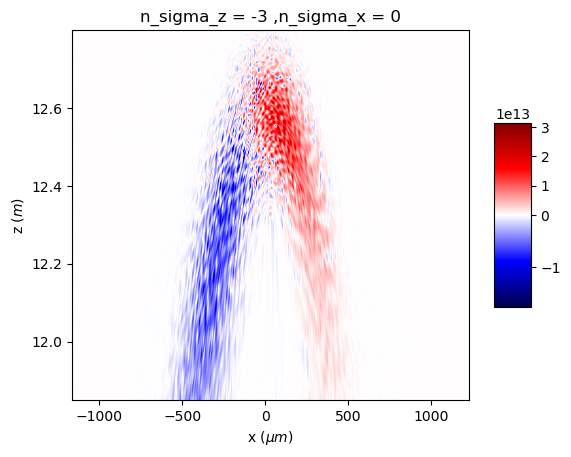

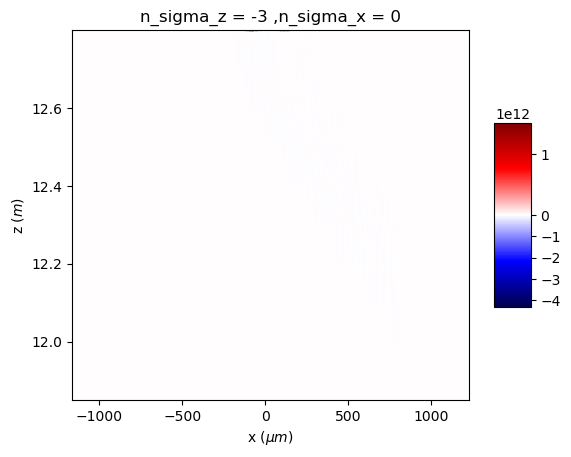

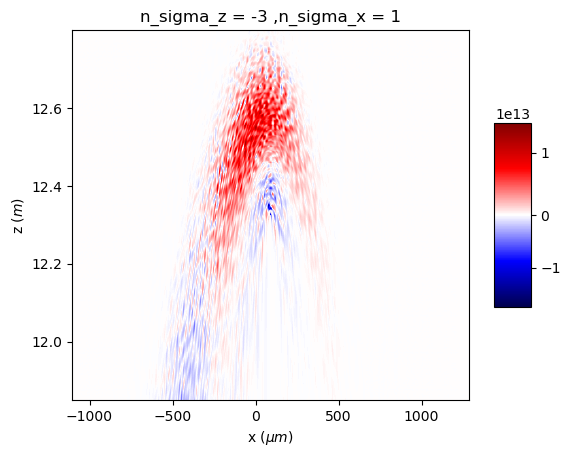

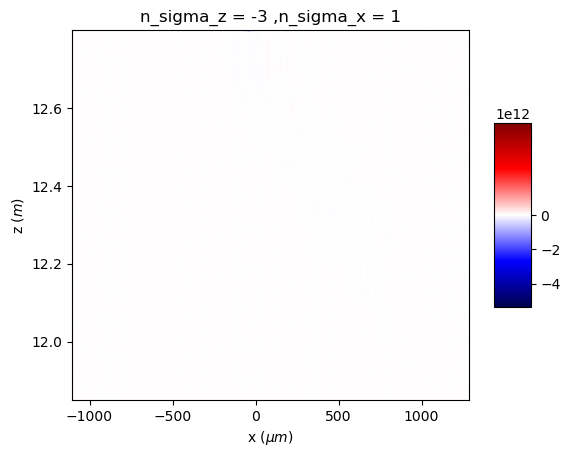

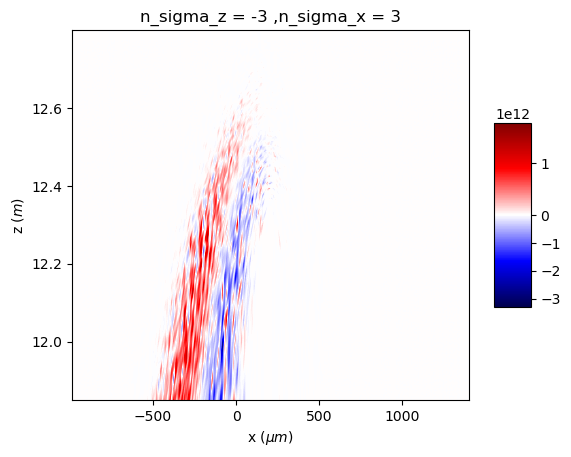

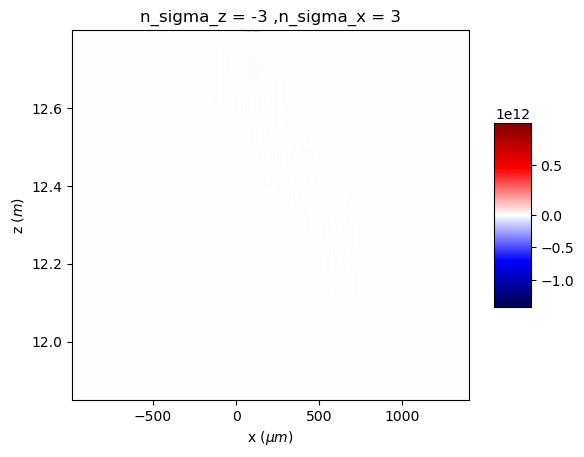

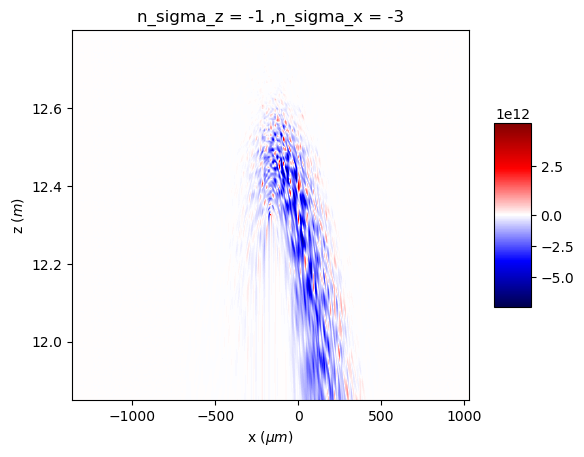

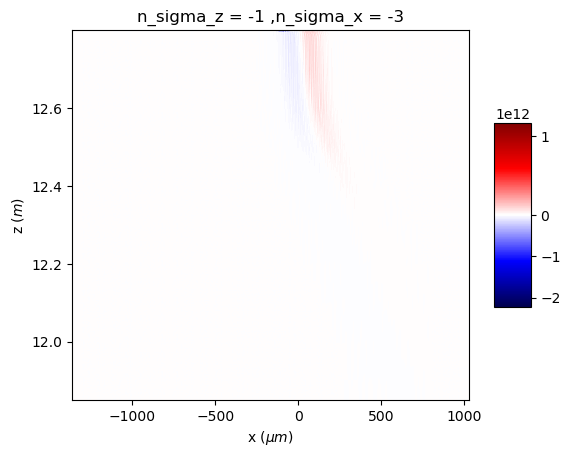

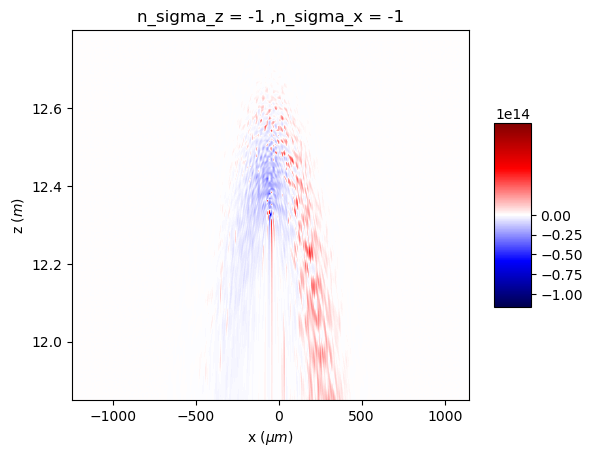

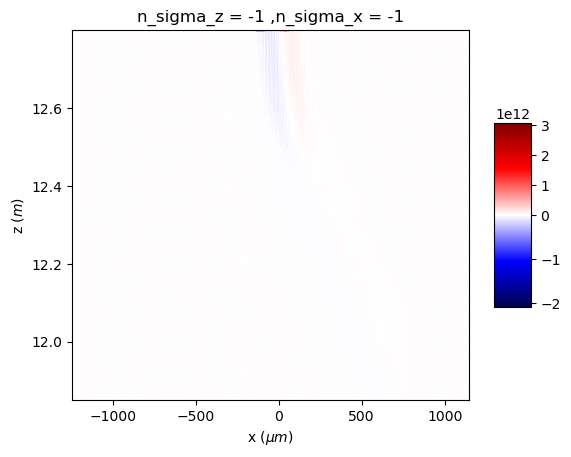

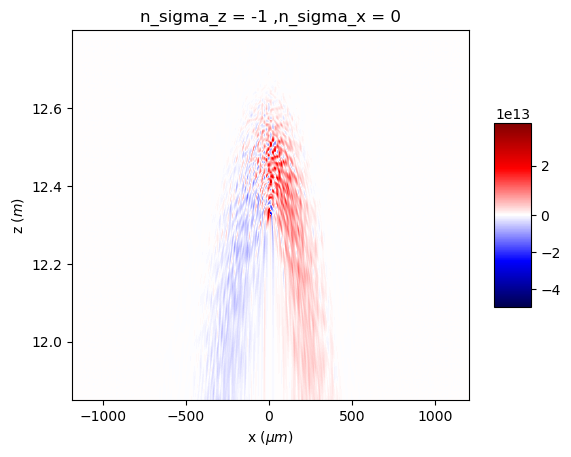

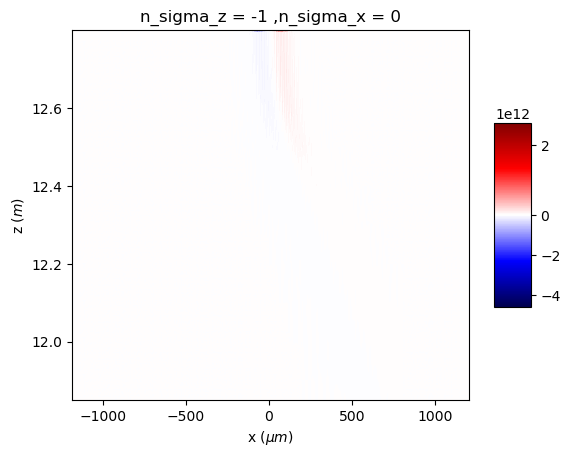

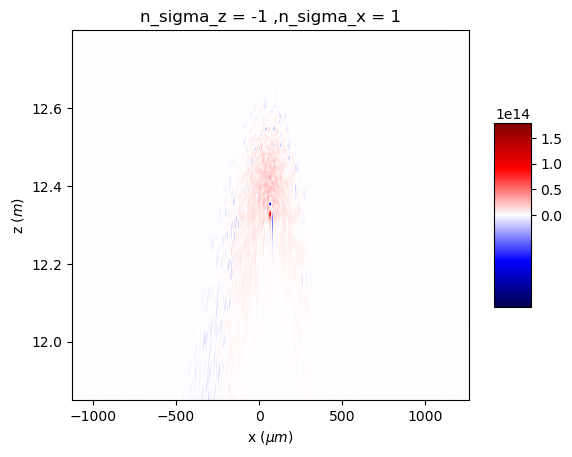

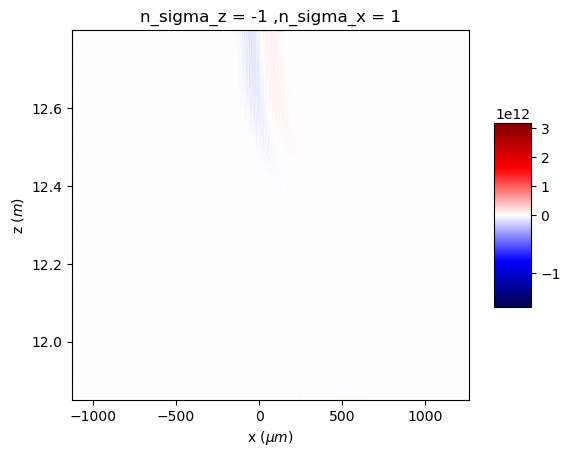

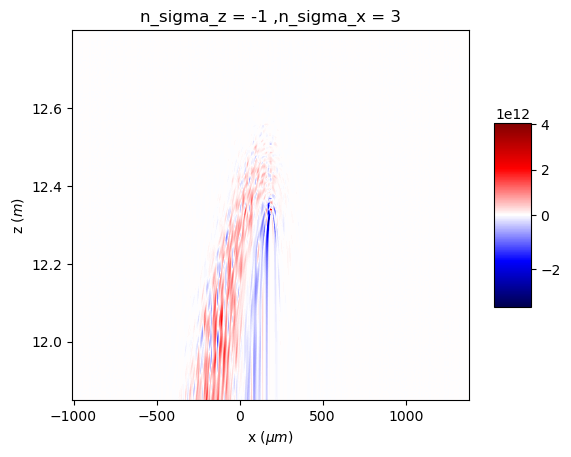

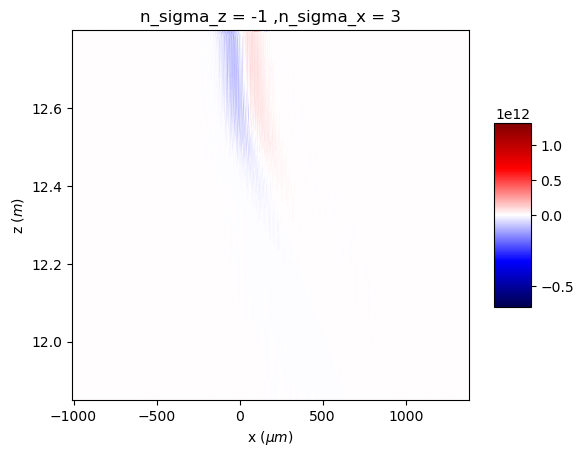

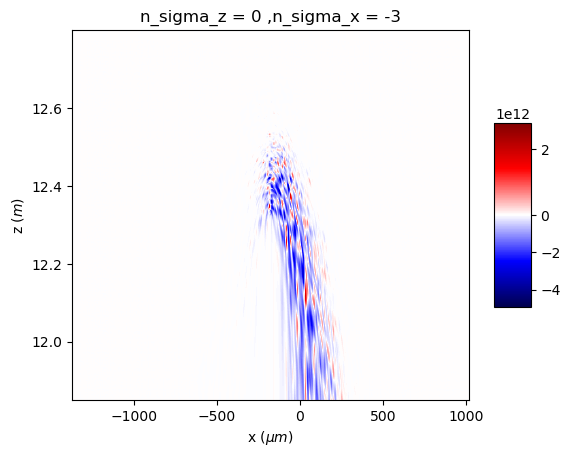

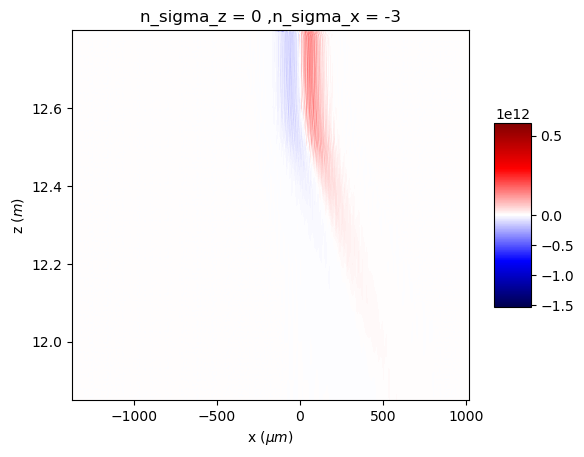

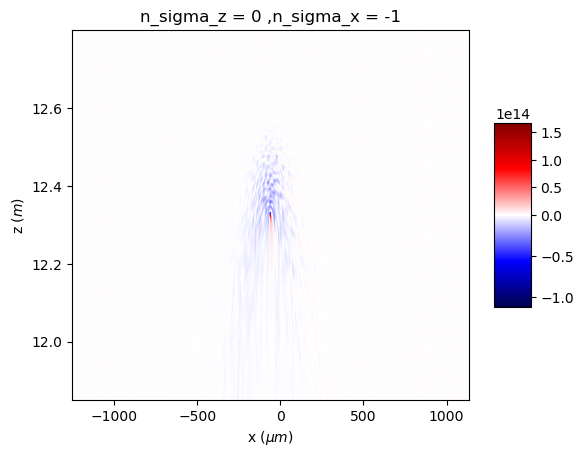

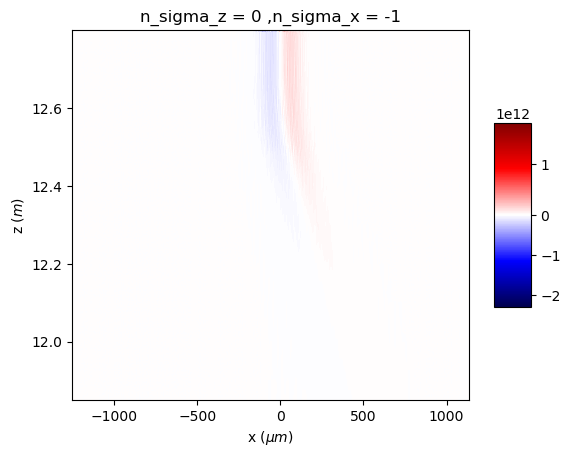

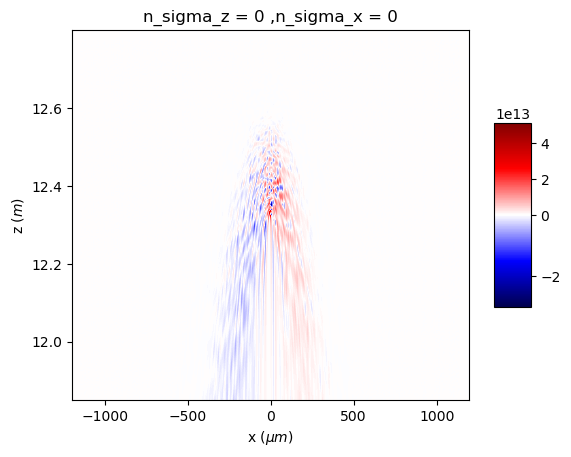

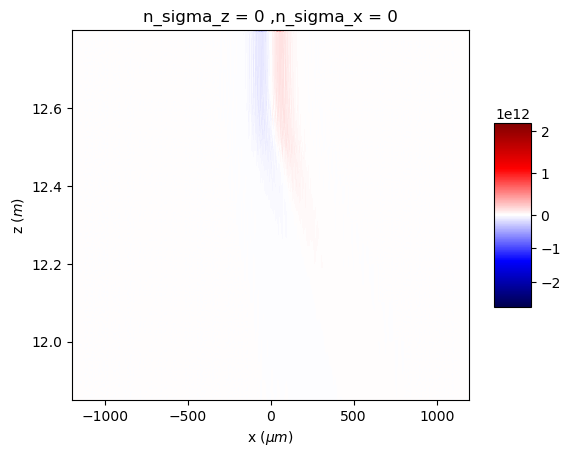

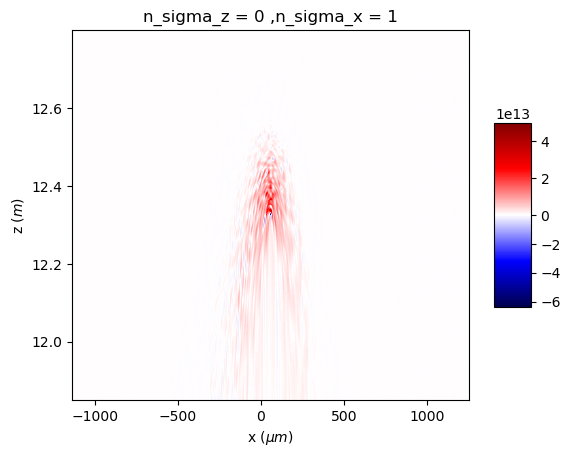

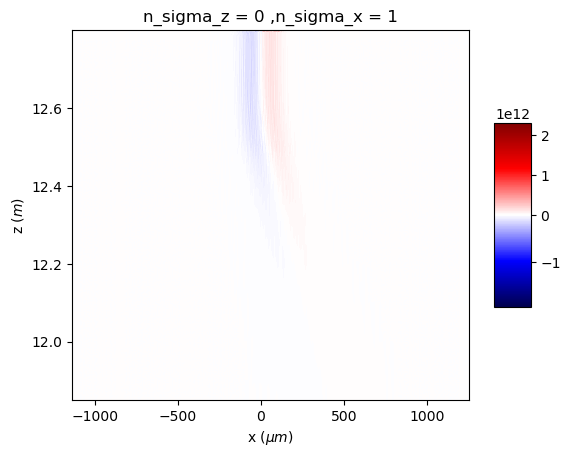

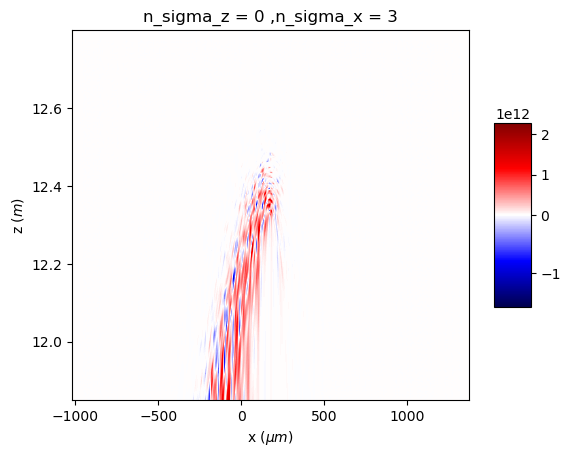

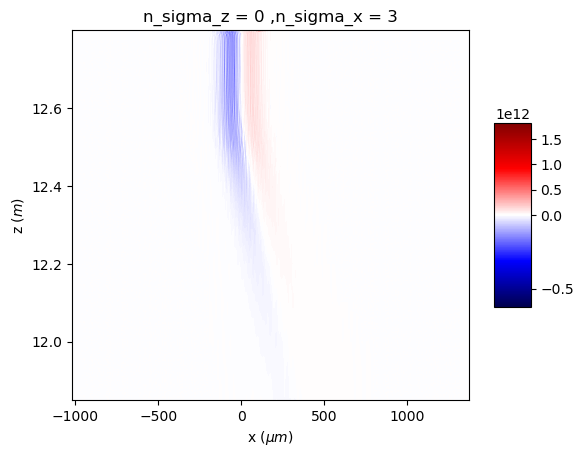

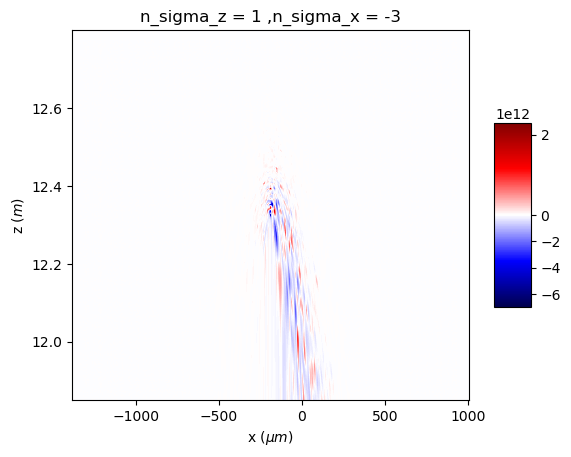

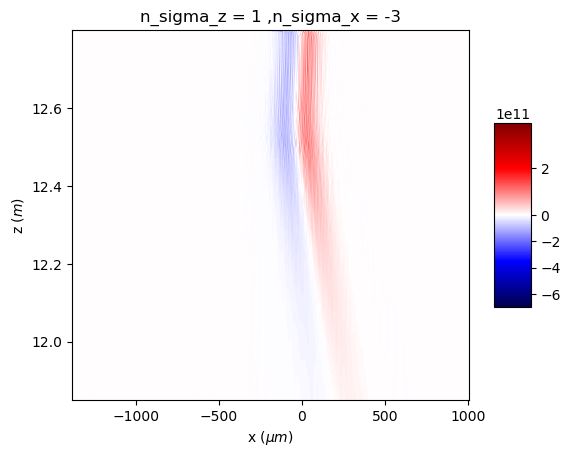

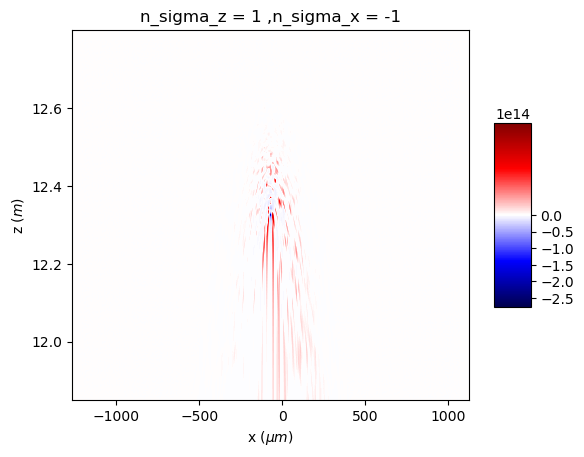

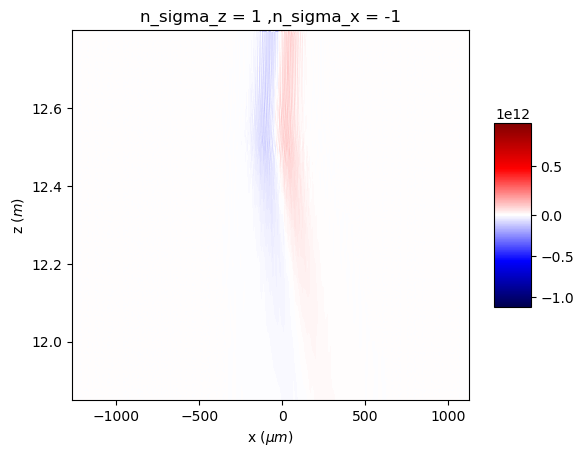

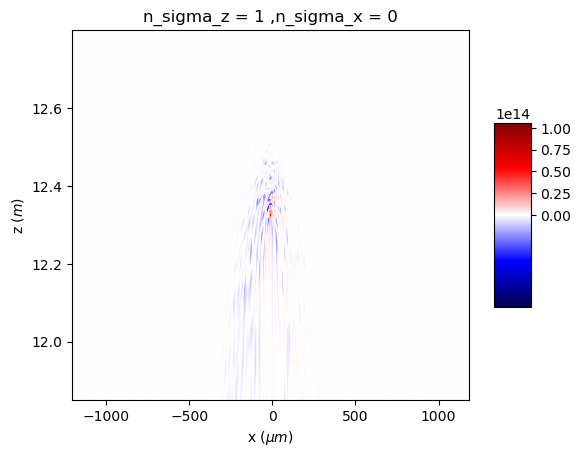

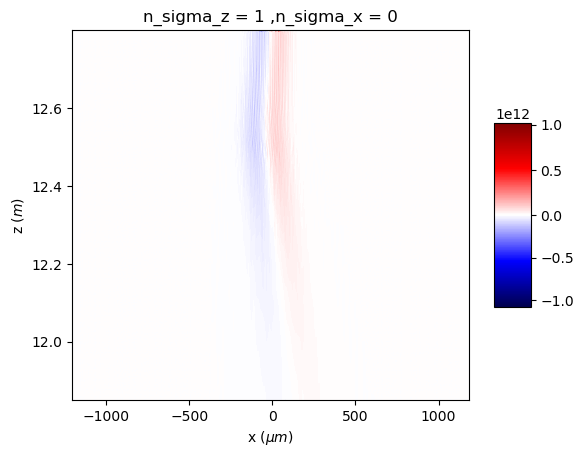

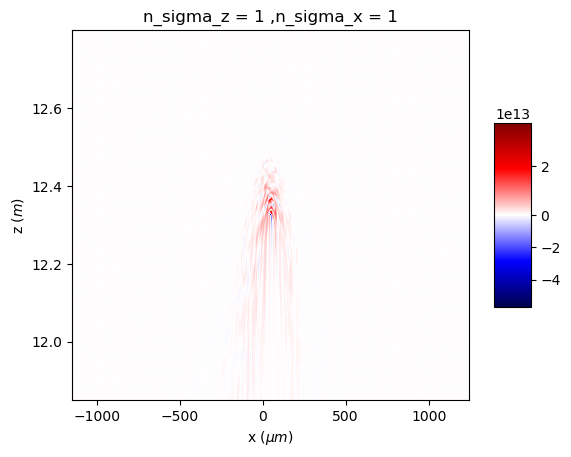

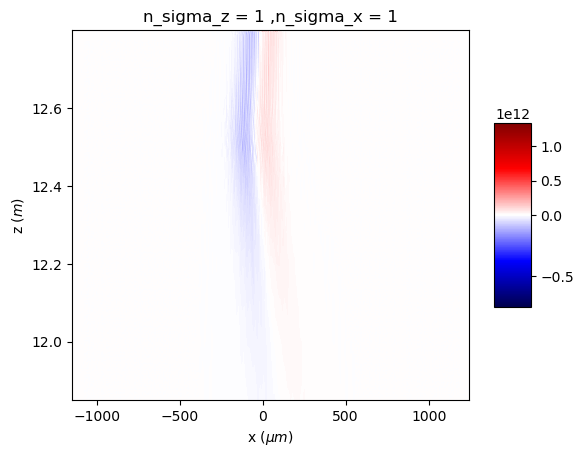

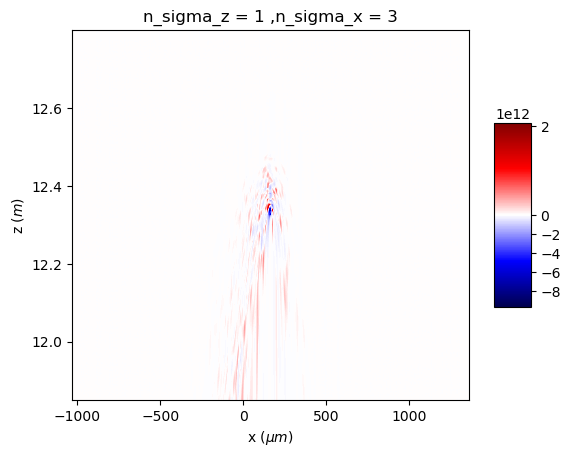

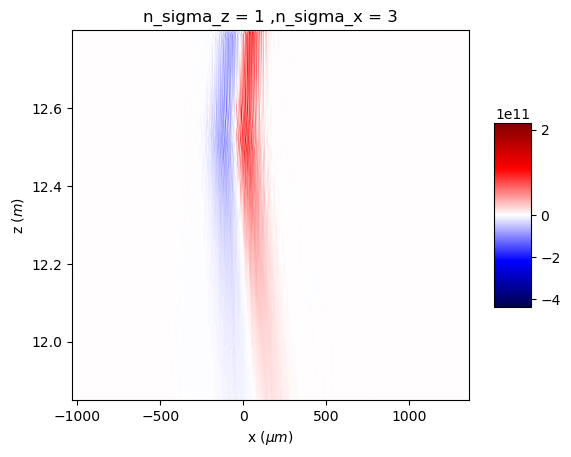

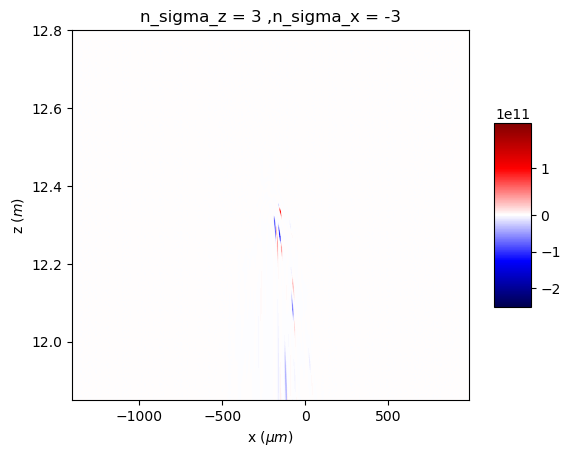

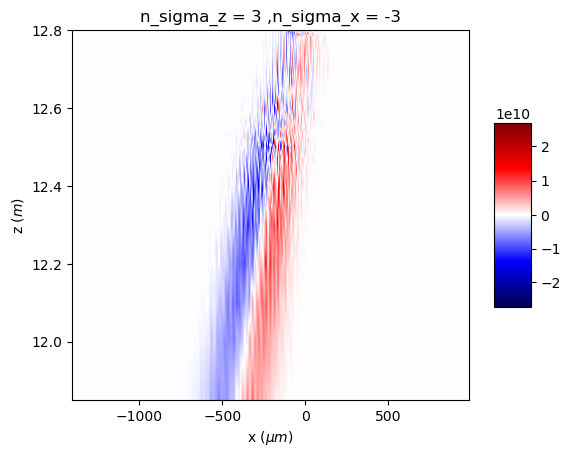

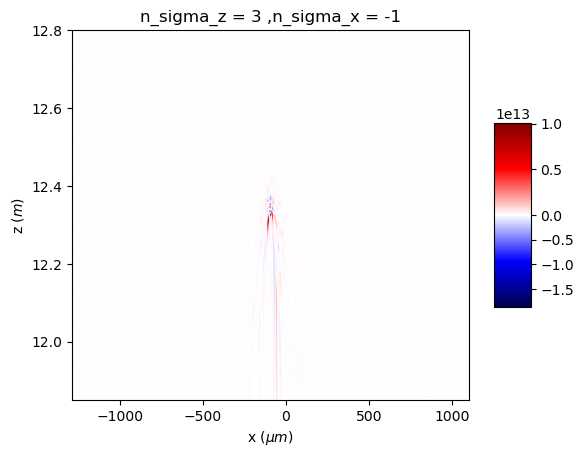

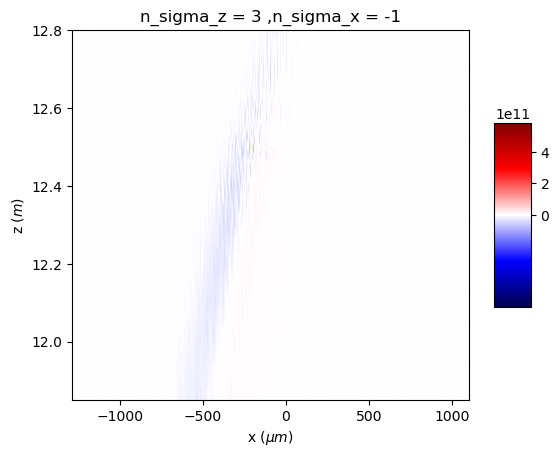

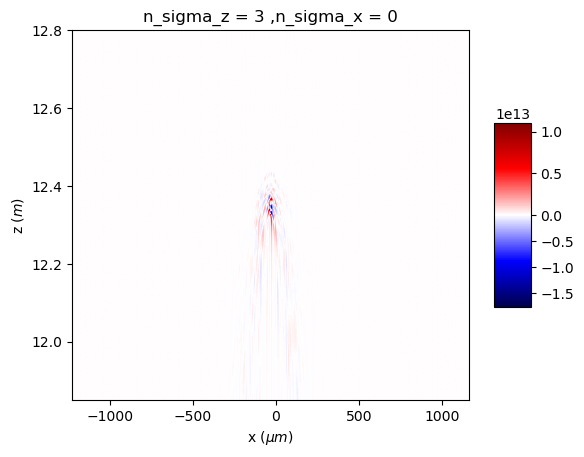

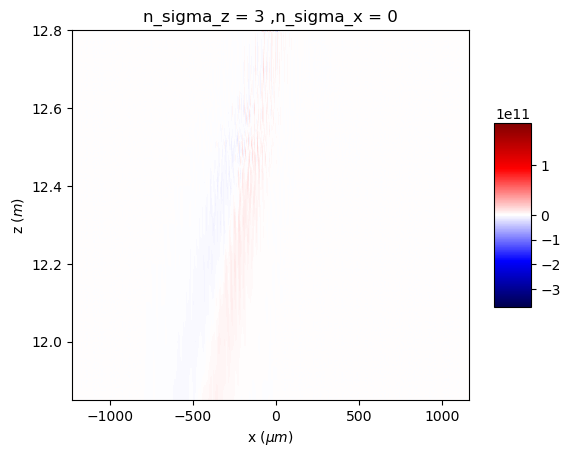

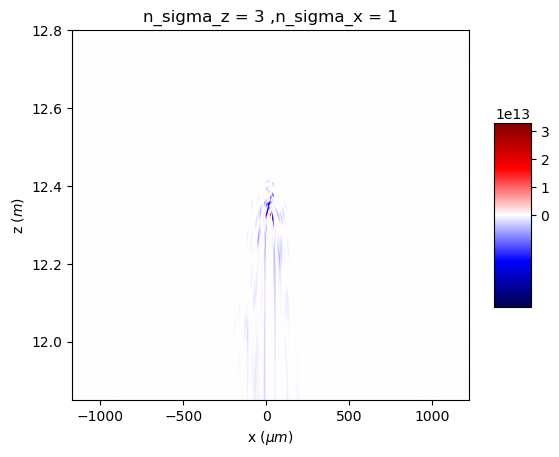

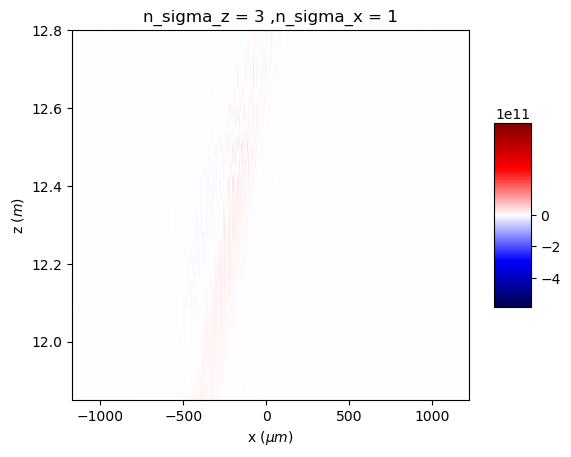

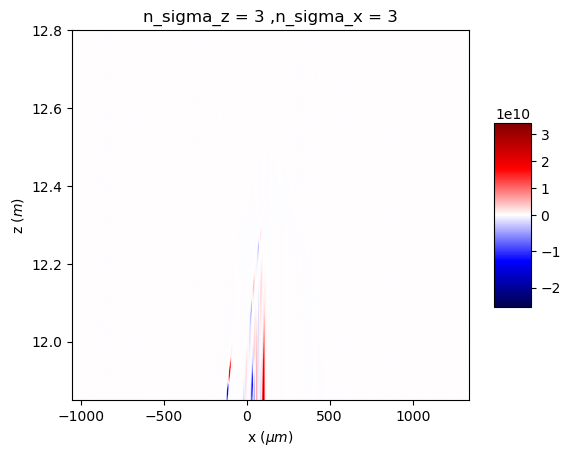

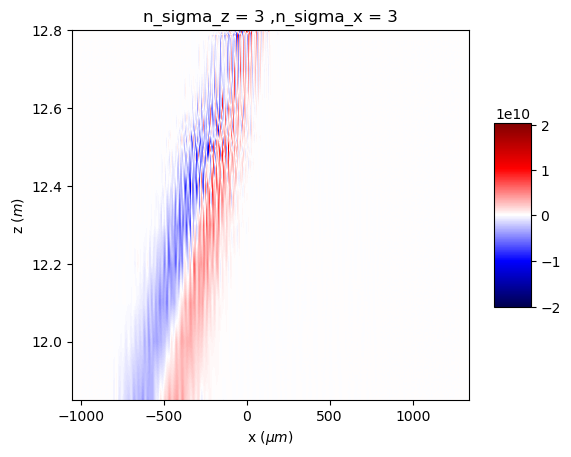

In [6]:
t = DtestCSR.beam.position
print(t)
for k in [-3,-1,0, 1,3]:
    s  = t + k*DtestCSR.beam.sigma_z
    for q in [-3, -1, 0, 1,3]:
        x = (s-t)*DtestCSR.beam.slope[0] + q*DtestCSR.beam._sigma_x_transform
        title = "n_sigma_z = " +  str(k) +  " ,n_sigma_x = " + str(q)
        
        xp, sp, CSR_integrand_z1, CSR_integrand_x1,CSR_integrand_z2, CSR_integrand_x2  = DtestCSR.get_CSR_wake(s, x, debug = True)

        plot_2D_contour(x = xp*1e6, y = (sp), z = CSR_integrand_z1.T, title = title)

        plot_2D_contour(x = xp*1e6, y = (sp), z = CSR_integrand_z2.T, title = title)
        
        

In [7]:
DtestCSR.formation_length

0.23811015779522998

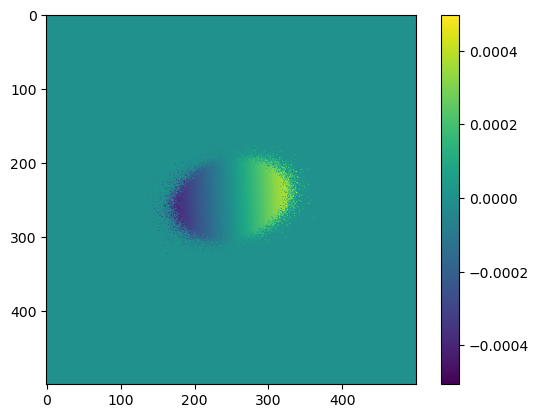

In [7]:
test = DtestCSR.DF_tracker.data_vx_interp[-1,:,:]
plt.imshow(test)
plt.colorbar()

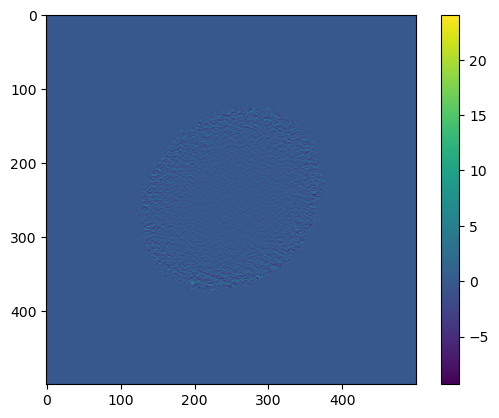

In [8]:
test = DtestCSR.DF_tracker.vx_x
plt.imshow(test)
plt.colorbar()

12.79999999999997


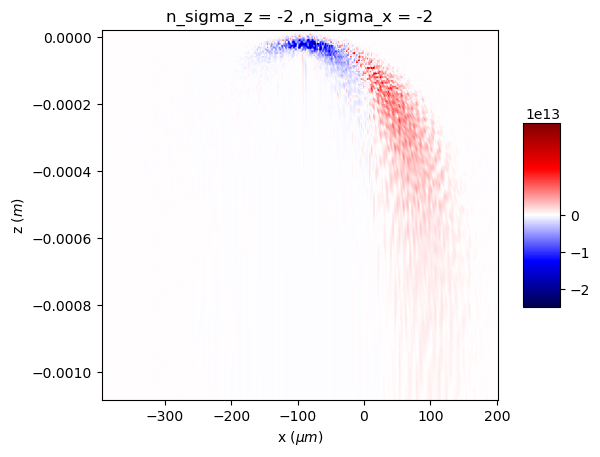

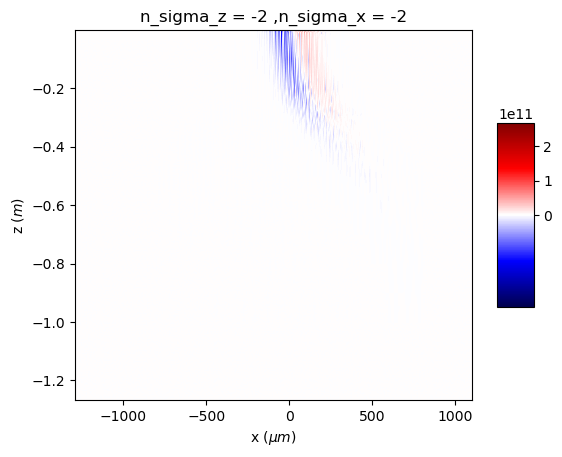

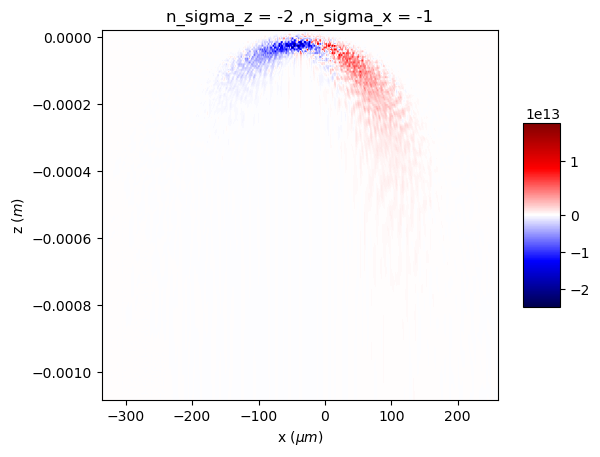

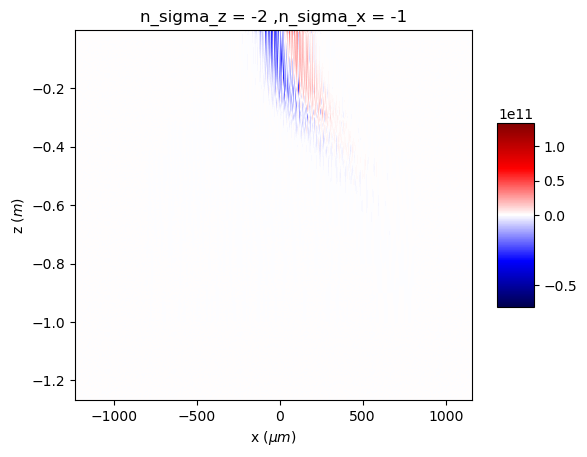

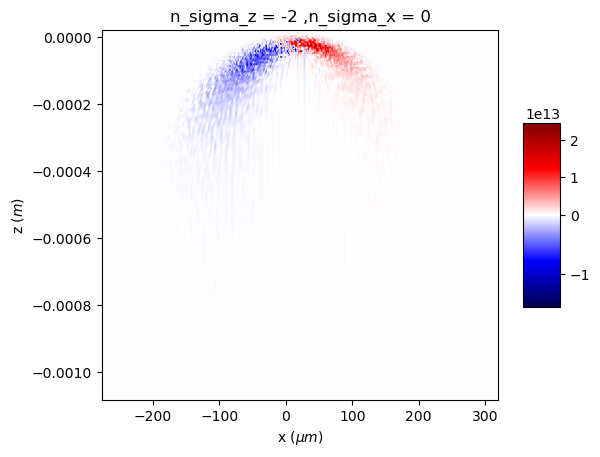

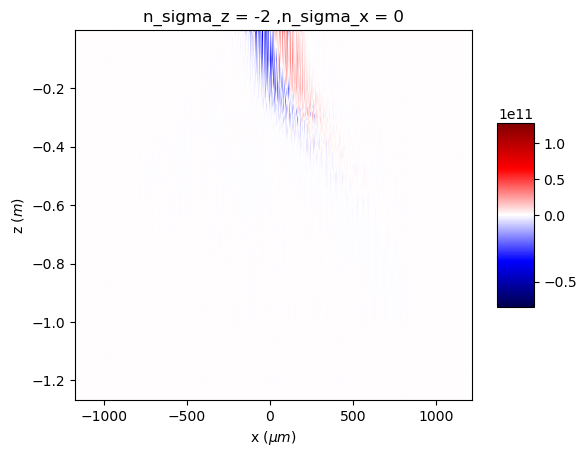

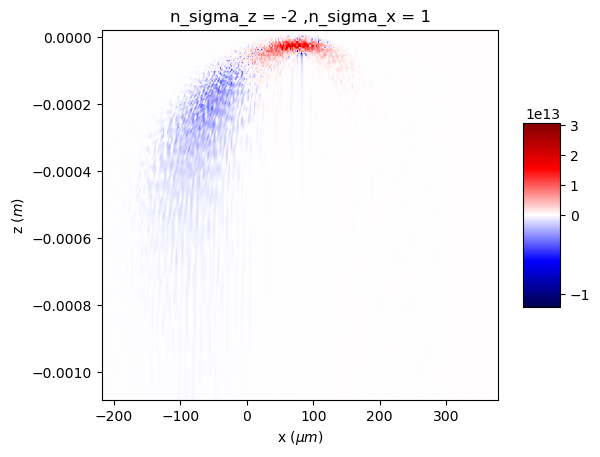

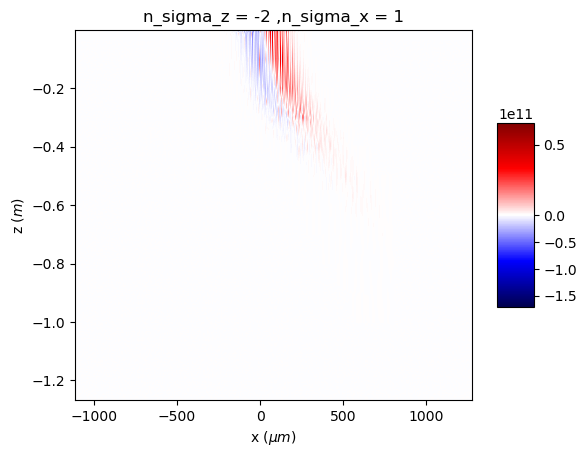

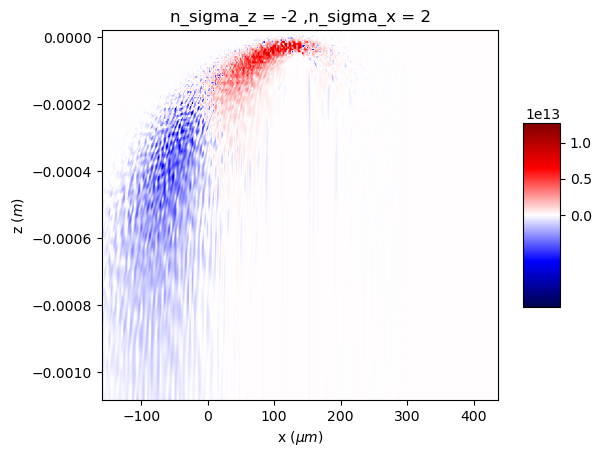

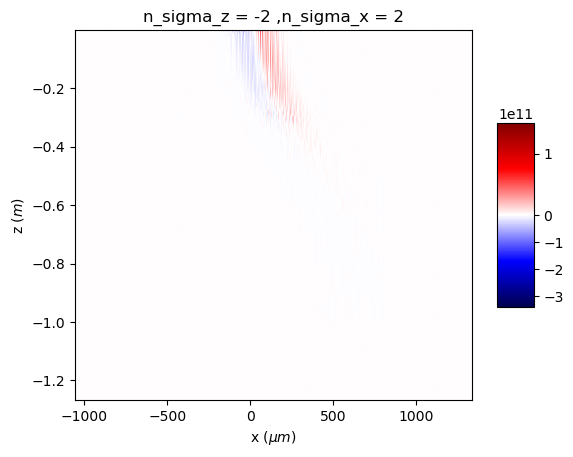

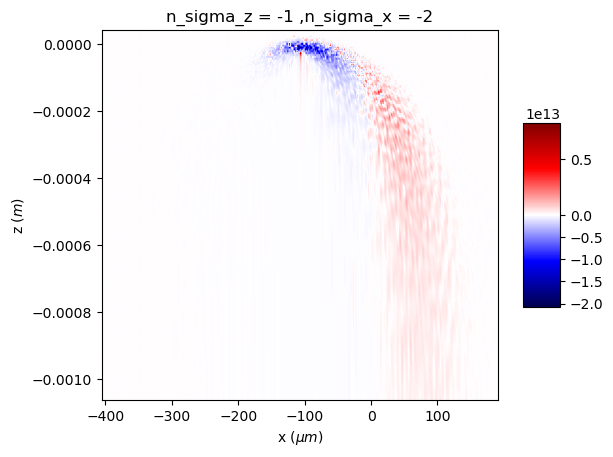

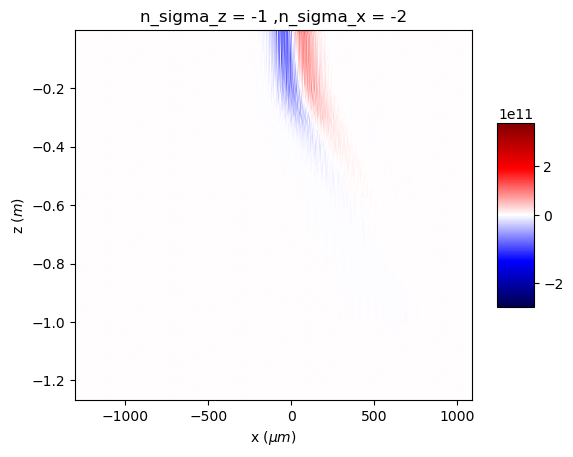

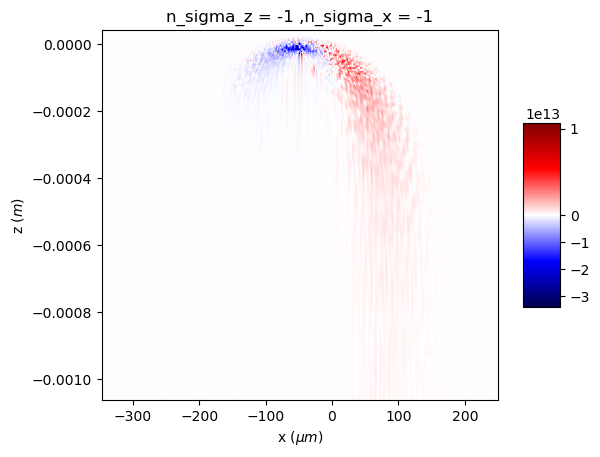

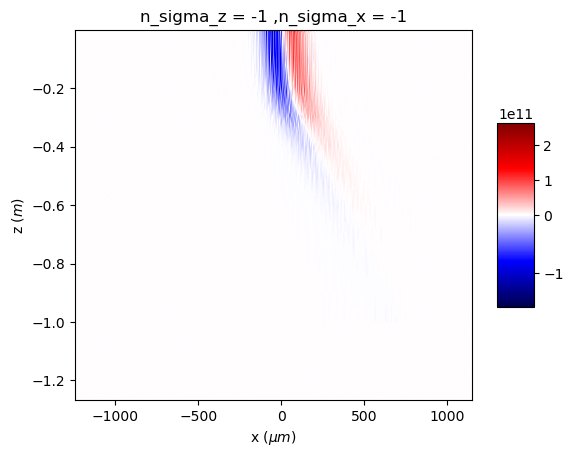

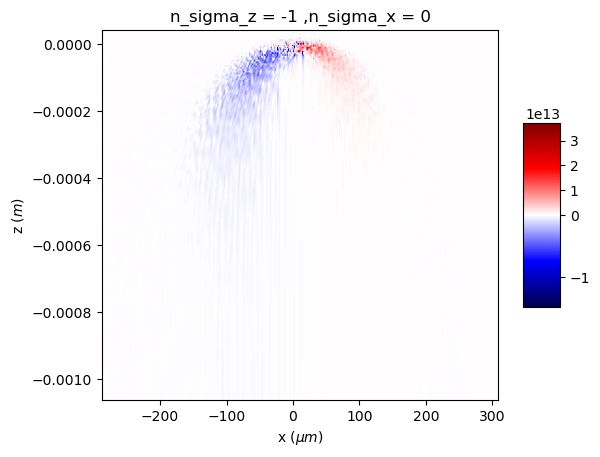

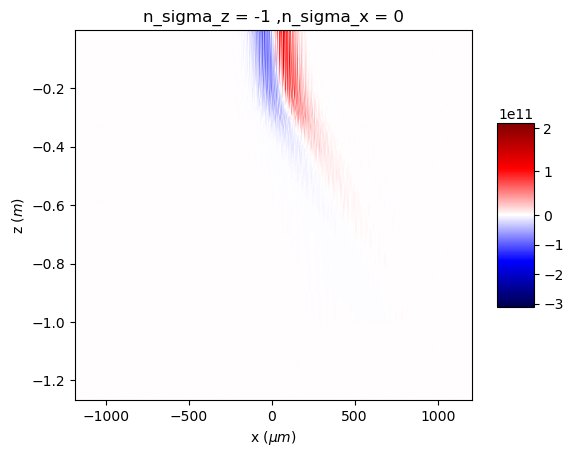

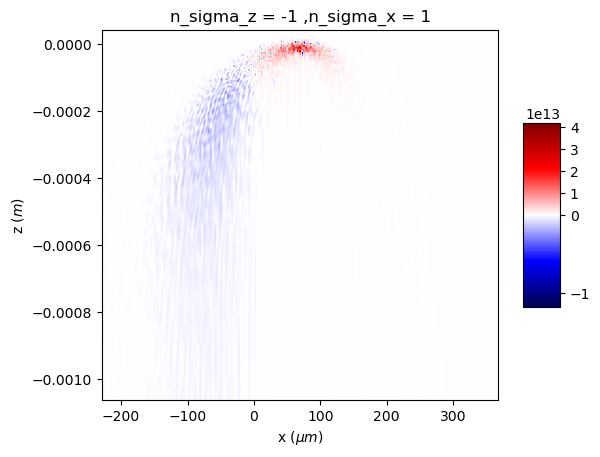

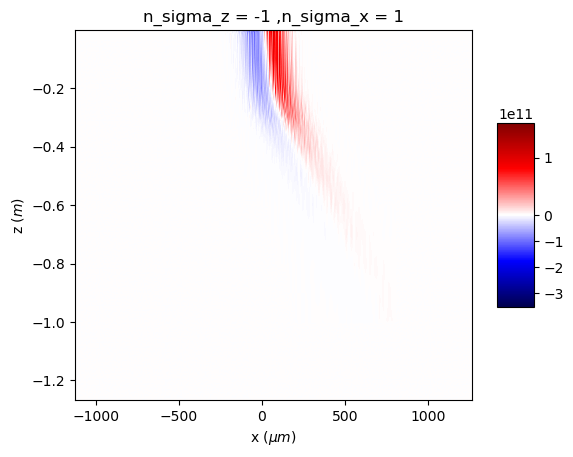

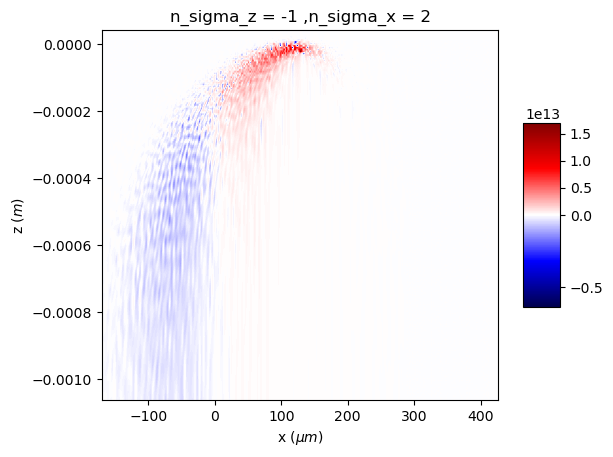

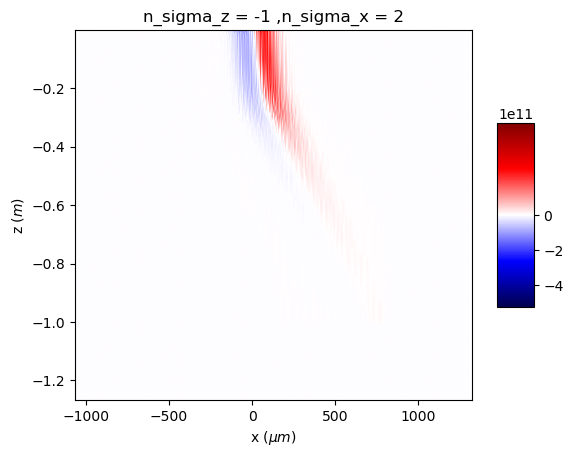

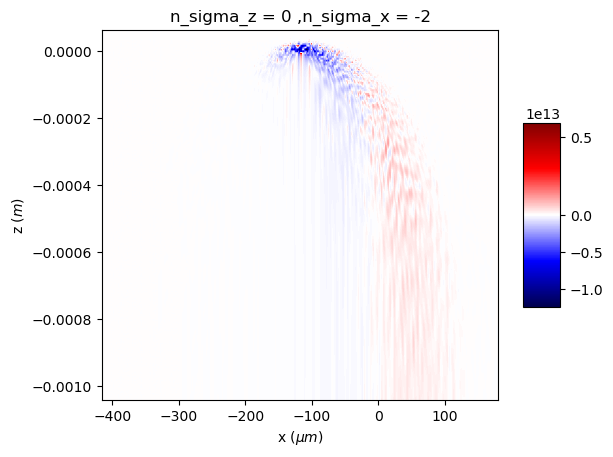

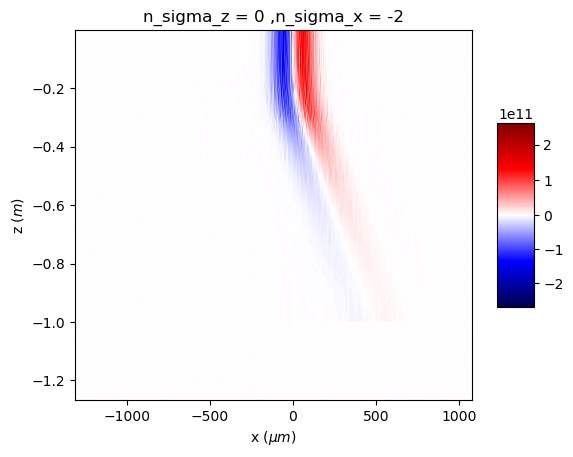

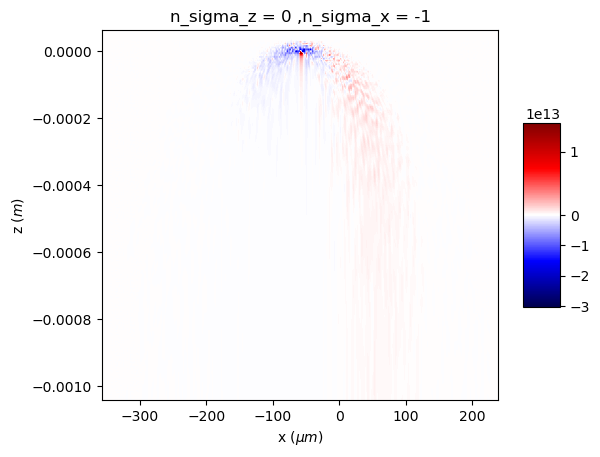

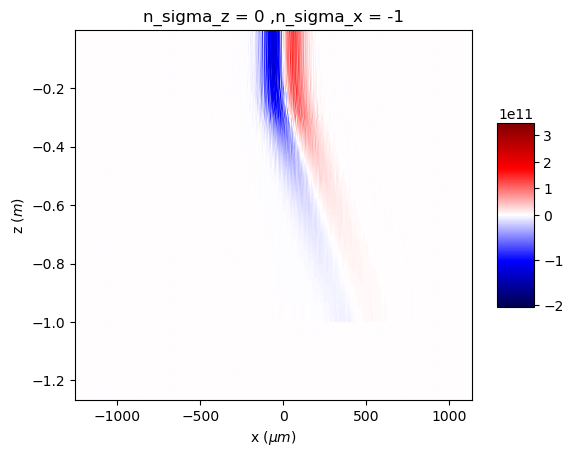

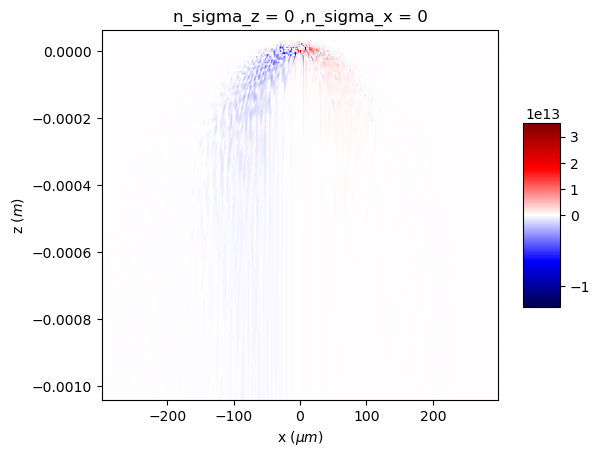

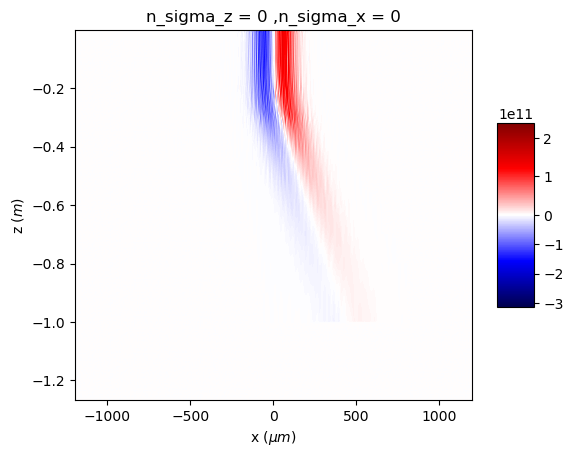

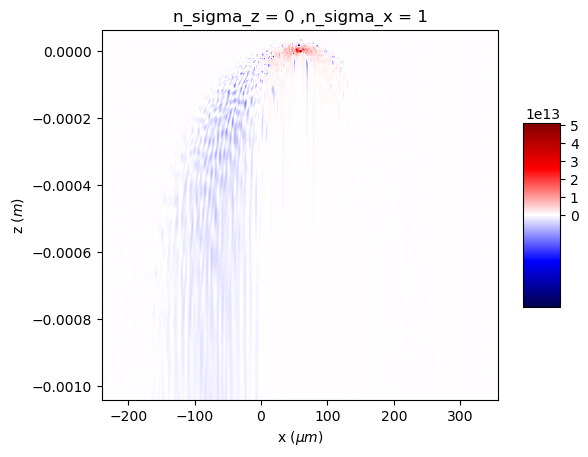

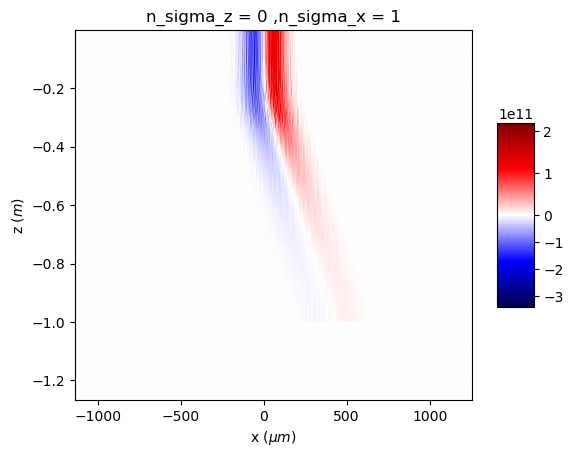

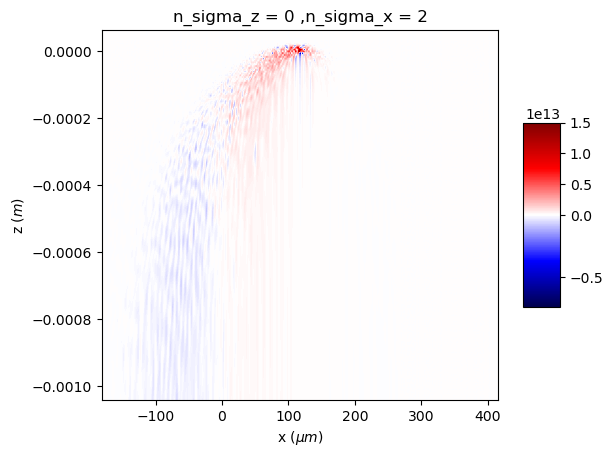

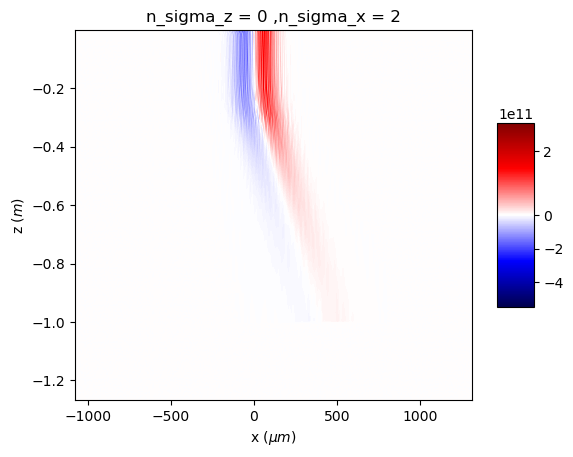

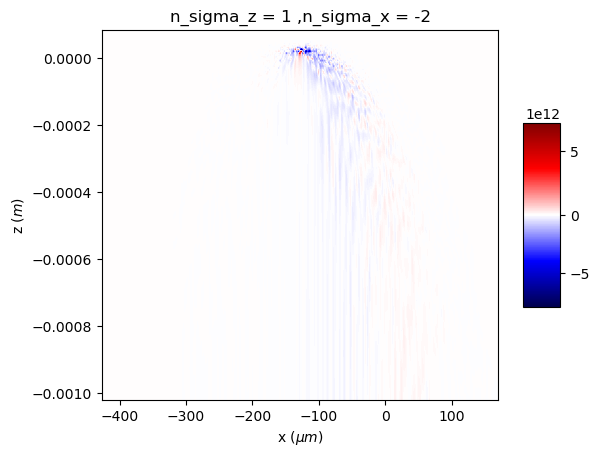

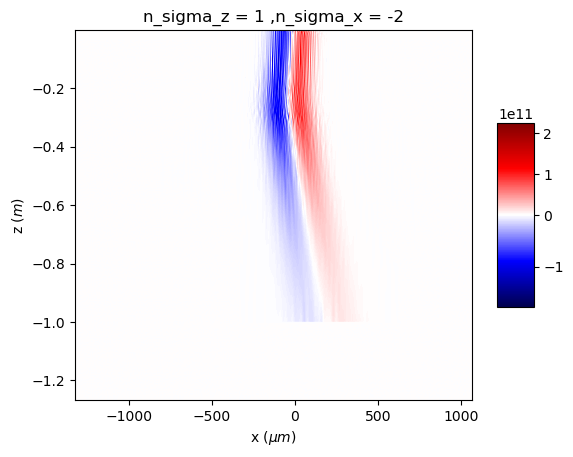

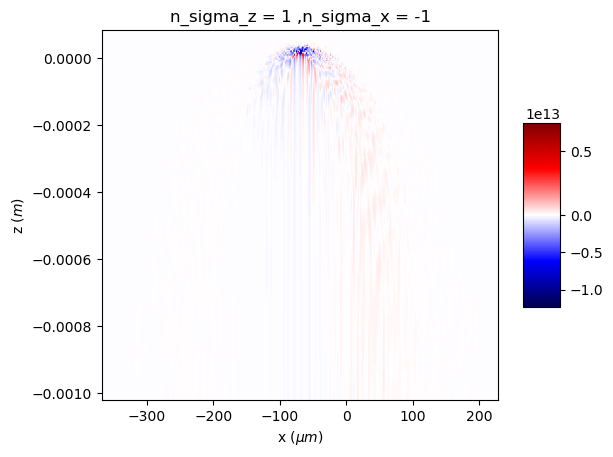

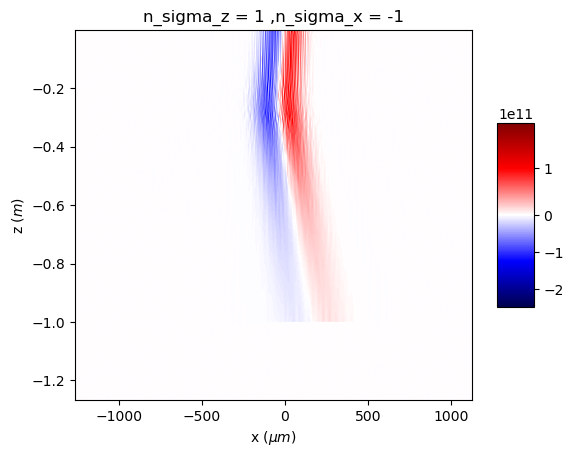

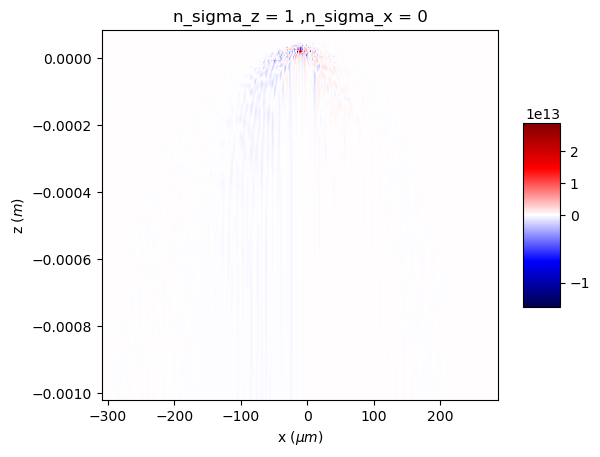

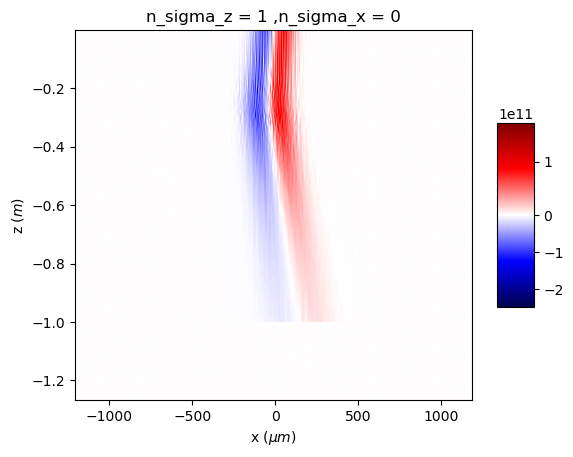

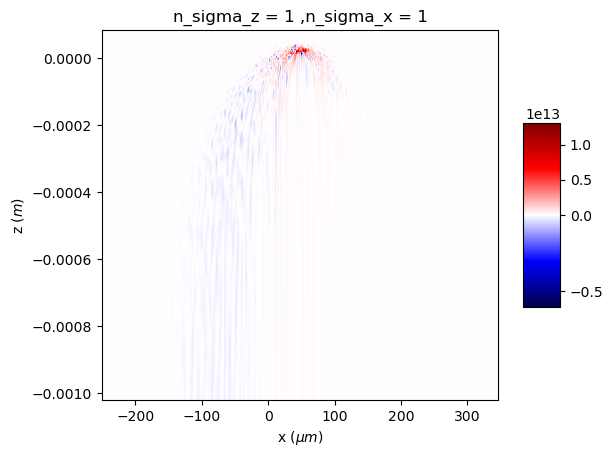

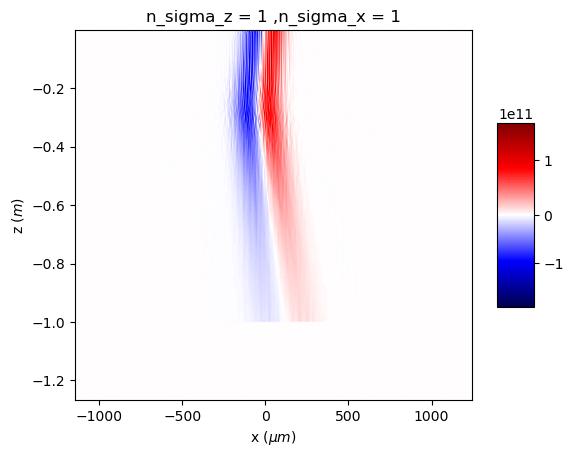

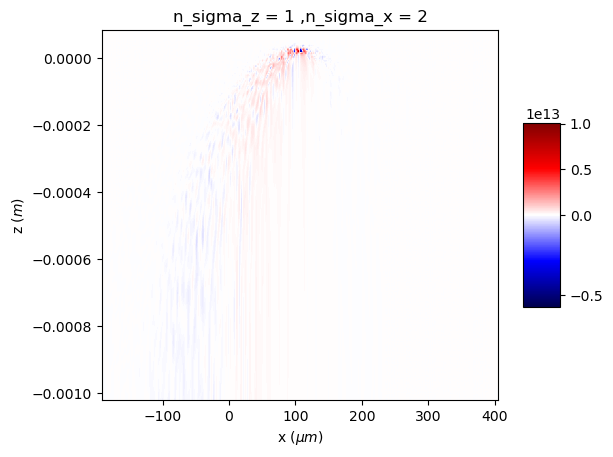

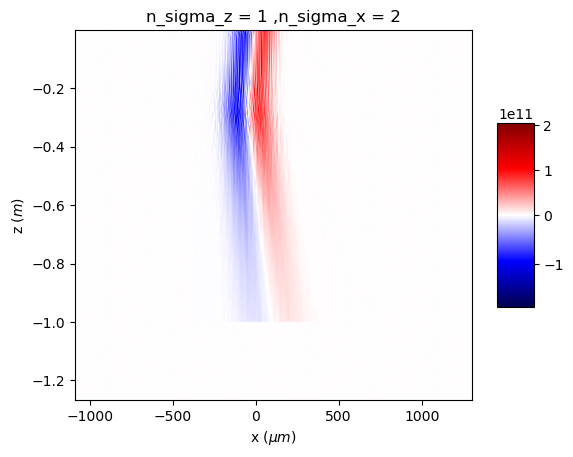

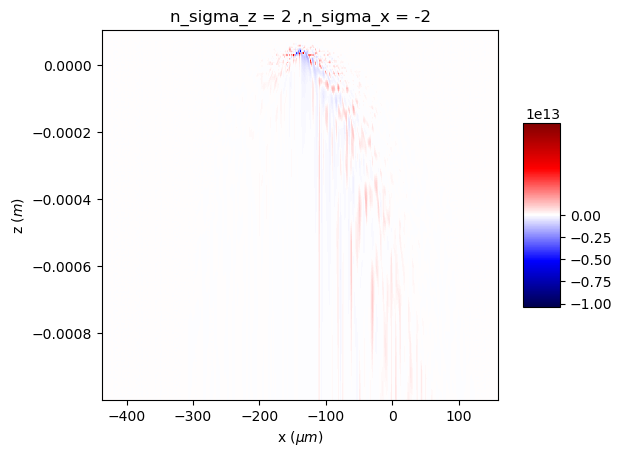

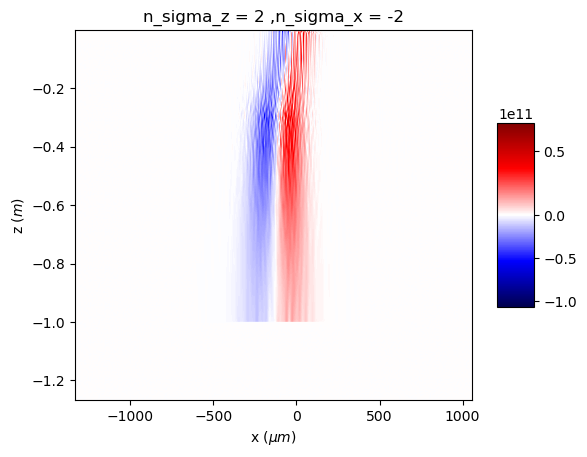

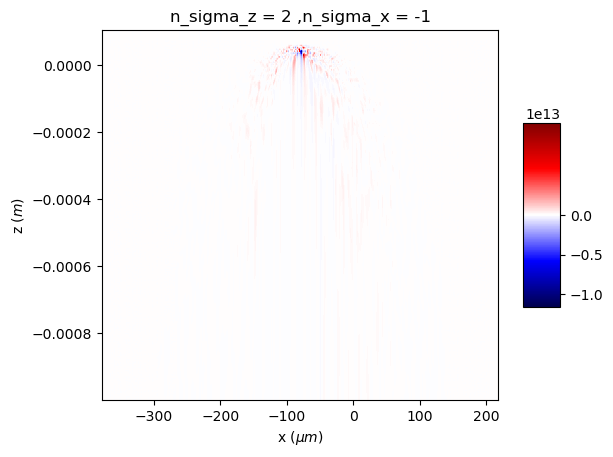

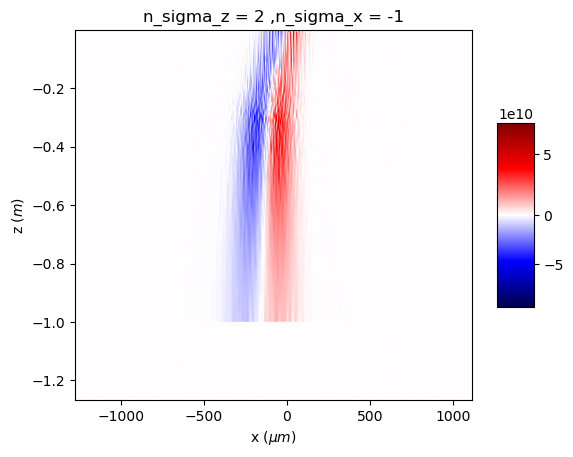

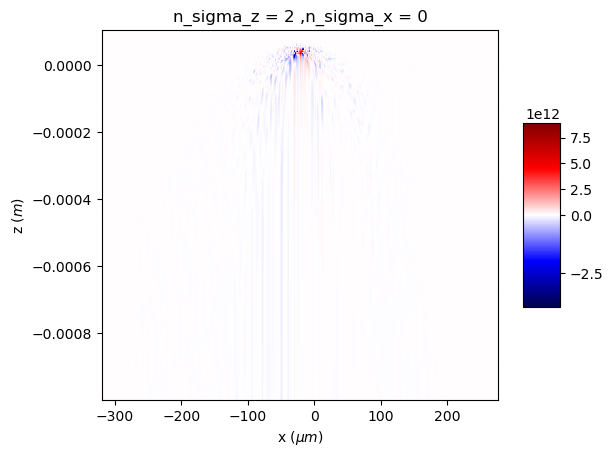

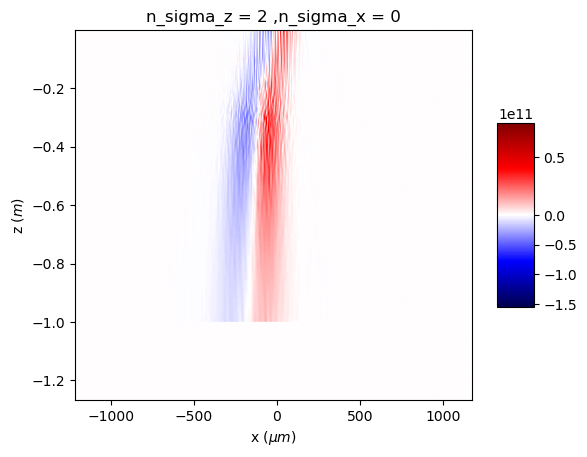

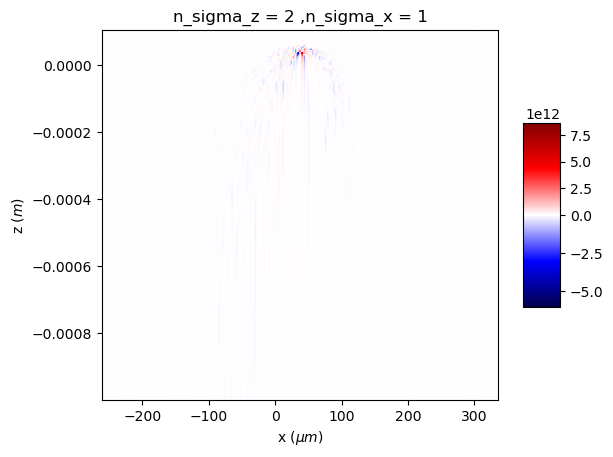

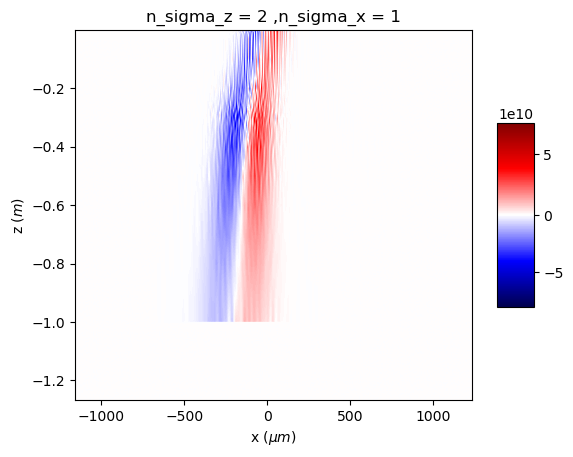

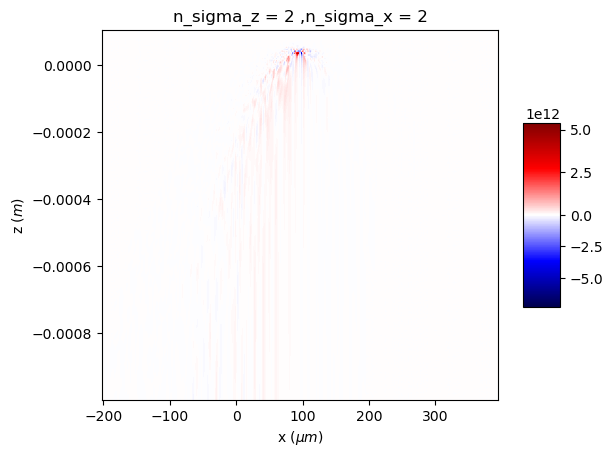

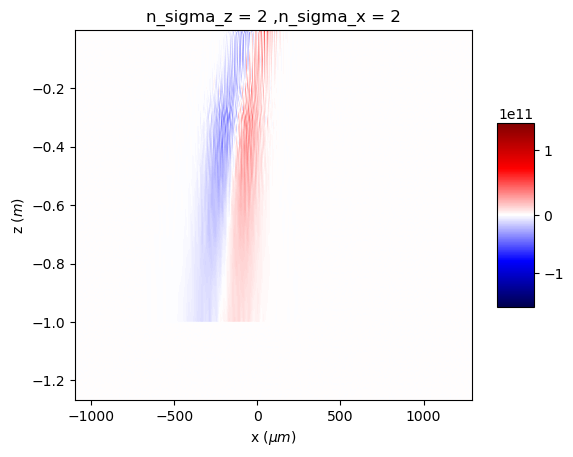

In [12]:
t = DtestCSR.beam.position
print(t)
for k in [-2,-1,0, 1,2]:
    s  = t + k*DtestCSR.beam.sigma_z
    for q in [-2, -1, 0, 1,2]:
        x = (s-t)*DtestCSR.beam.slope[0] + q*DtestCSR.beam._sigma_x_transform
        title = "n_sigma_z = " +  str(k) +  " ,n_sigma_x = " + str(q)
        
        tan_theta = DtestCSR.beam._slope[0]
        x0 = DtestCSR.beam._mean_x
        if np.abs(tan_theta) <= 1:   #if theta <45 degre, the chirp band can be ignored. theta is the angle in z-x plane
            s1 = s - 50*DtestCSR.beam._sigma_z
            s2 = s + 3*DtestCSR.beam._sigma_z
            xmin = x - 5*DtestCSR.beam._sigma_x
            xmax = x + 5*DtestCSR.beam._sigma_x
        else:
            if tan_theta > 0:
                tan_alpha = -2*tan_theta/(1-tan_theta**2) # alpha = pi - 2 theta, tan_alpha > 0
                d = (5*DtestCSR.beam._sigma_x + x0 - x)/tan_alpha
                s1 = np.max((0,s - d))
                s2 = s + 3*DtestCSR.beam._sigma_z
                xmax = x0 + 5*DtestCSR.beam._sigma_x
                xmin = x - 20*DtestCSR.beam._sigma_x_transform
        
            else:
                tan_alpha = 2*tan_theta/(1-tan_theta**2)
                d = -(x0 - x - 5*DtestCSR.beam._sigma_x)/tan_alpha
                s1 = np.max((0,s - d))
                s2 = s + 3*DtestCSR.beam._sigma_z
                xmin = x0 - 5*DtestCSR.beam._sigma_x
                xmax = x + 20*DtestCSR.beam._sigma_x_transform
        sp = np.linspace(s1, s2, 200)
        xp = np.linspace(xmin, xmax, 600)
        [xp_mesh, sp_mesh] = np.meshgrid(xp, sp, indexing='ij')

       
        CSR_integrand_z, CSR_integrand_x = DtestCSR.get_CSR_integrand(s = s, t = t, x = x, xp = xp_mesh, sp = sp_mesh)
        ax = plot_2D_contour(x = xp*1e6, y = (sp-t), z = CSR_integrand_z.T, title = title)

        #------------------------------
        s3 = np.max((0, s1 - 2*DtestCSR.formation_length))
        sp = np.linspace(s3, s1, 800)
        if np.abs(tan_theta) <= 1:
            xmin = x - 20*DtestCSR.beam._sigma_x
            xmax = x + 20*DtestCSR.beam._sigma_x
        
        else:
            xmin = x - 5*DtestCSR.beam._sigma_x
            xmax = x + 5*DtestCSR.beam._sigma_x
       
        xp = np.linspace(xmin, xmax, 800)
        [xp_mesh, sp_mesh] = np.meshgrid(xp, sp, indexing='ij')


        CSR_integrand_z, CSR_integrand_x = DtestCSR.get_CSR_integrand(s = s, t = t, x = x, xp = xp_mesh, sp = sp_mesh)
        ax = plot_2D_contour(x = xp*1e6, y = (sp-t), z = CSR_integrand_z.T, title = title)
        

#### ?plot_2D_contour